# 2024-02-24 35 - Is Constrained PatchTST worth exploring.ipynb

## Libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from utils import wandb_utils

## Download data

In [17]:
df = wandb_utils.get_experiment_data("Autoformer-javierdev","alelab",experiment_tags=[],query_dict={"$and": [
                        {"tags": {"$in": ["patch_tst_dev_comparison"]}},
                        {"state": {"$in":["finished","crashed"]}},
        ]})

100%|██████████| 3/3 [00:00<00:00, 55.67it/s]

WARNING!! Missing pointwise/cvar/0.01 in run lnvkkeod on sweep None. Filling all poitwisewith NAN.
WARNING!! Missing pointwise/cvar/0.01 in run tuodp9o1 on sweep None. Filling all poitwisewith NAN.
WARNING!! Missing pointwise/cvar/0.01 in run gu125tga on sweep None. Filling all poitwisewith NAN.
Fetched 3 runs
Total records: (1728, 108)
Total runs: 3


## Compare the runs

In [18]:
# df_constrained = df.query('type=="Constrained"').copy()
# df_erm = df.query('type=="ERM"').copy()
# #(data_path,model,pred_len,constraint_level,constrained_unconstraled)
# distinct_constraints = df_constrained[['data_path','model','pred_len','constraint_type']].drop_duplicates()

# # crossjoin the ERM mse to all constraint levels
# df_erm_w_broadcasted_constraint_levels = df_erm.drop(columns=['constraint_type']).merge(distinct_constraints,on=['data_path','model','pred_len'],how='left')
# df_to_plot = pd.concat([df_constrained,df_erm_w_broadcasted_constraint_levels],axis=0)

# # sanity check
# display(df_erm_w_broadcasted_constraint_levels.shape)
# print(f"Three constraints per experiment, broadcasted dataset size be equal to {df_erm.shape[0]*1}")
# display(df_to_plot.shape)
# print(f"Final dataset size should be equal to {df_constrained.shape[0]+df_erm.shape[0]*1}")
# # Adding the constraint violation column
# df_to_plot["constraint_violation"] = (df_to_plot.mse-df_to_plot.constraint_level).clip(lower=0)
# df_to_plot['is_infeasible'] = (df_to_plot.constraint_violation>0)*1

# # sanity check
# dd=df_to_plot[['run_id','model','type','step','mse','constraint_level','constraint_violation','is_infeasible']] 
# print("For ERM")
# display(dd.query('type=="ERM"').query('constraint_violation>0').head())
# print("For Constrained")
# display(dd.query('type=="Constrained"').query('constraint_violation>0').head())


<AxesSubplot:xlabel='step', ylabel='mse'>

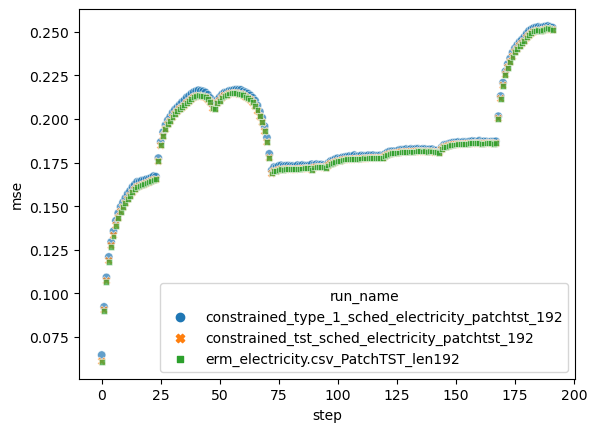

In [19]:
# PARAMS
split="test"
constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_to_plot=df.query('split==@split')
#g = sns.FacetGrid(df_to_plot, col='run_id', row='data_path', hue='type', height=3, aspect=1.5, legend_out=True)
#g.map(sns.scatterplot, "step", "mse", alpha=.7)
sns.scatterplot(data=df_to_plot, x="step", y="mse", hue="run_name", style="run_name", alpha=.7)